In [1]:
import os
import cv2

In [2]:
data_path = 'data/Brian_tumor_images/'

In [3]:
data_path

'data/Brian_tumor_images/'

In [4]:
os.listdir(data_path)

['Testing', 'Training']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
os.listdir(data_path + '/Testing/' + '/glioma_tumor/')[0]

'image(1).jpg'

In [7]:
testing_path = data_path + '/Testing/'

In [8]:
training_path = data_path + '/Training/'

In [9]:
glioma_cell = data_path + '/Testing/' + '/glioma_tumor/' + 'image(1).jpg'

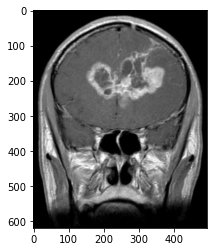

In [10]:
plt.imshow(imread(glioma_cell))

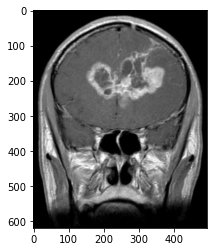

In [11]:
plt.imshow(cv2.imread(data_path + '/Testing/' + '/glioma_tumor/' + 'image(1).jpg'))

In [12]:
dim1 = []
dim2 = []


for image_name in os.listdir(data_path + '/Testing/' + '/glioma_tumor/'):
    
    img = cv2.imread(data_path + '/Testing/' + '/glioma_tumor/' + image_name)
    
    d1, d2, color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)
    
    
    
    
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


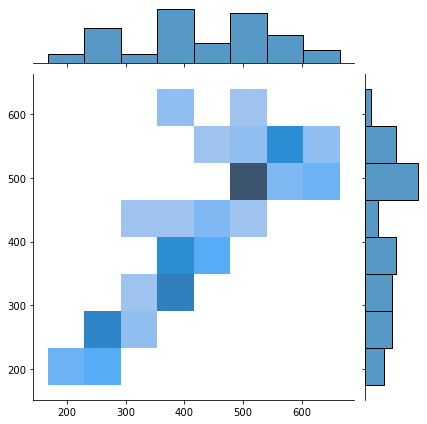

In [13]:
sns.jointplot(dim1, dim2, kind='hist')

In [14]:
np.mean(dim1)

428.4

In [15]:
np.mean(dim2)

407.75

In [16]:
image_shape = (400, 400, 3)

In [17]:
imread(glioma_cell).max()

255

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              rescale=1/255,
                              fill_mode='nearest')

In [20]:
glioma_cell = imread(glioma_cell)

In [21]:
glioma_cell.shape

(619, 495, 3)

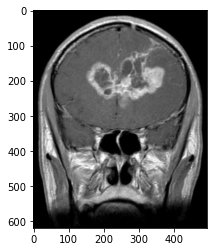

In [22]:
plt.imshow(glioma_cell)

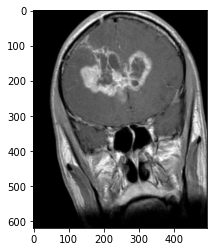

In [23]:
plt.imshow(image_gen.random_transform(glioma_cell))

In [24]:
image_gen.flow_from_directory(training_path)

Found 2870 images belonging to 4 classes.


In [25]:
image_gen.flow_from_directory(testing_path)

Found 394 images belonging to 4 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)       0

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
batch_size = 64

In [32]:
train_img_gen = image_gen.flow_from_directory(training_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [33]:
test_img_gen = image_gen.flow_from_directory(testing_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)

Found 394 images belonging to 4 classes.


In [34]:
train_img_gen.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [35]:
result = model.fit_generator(train_img_gen, epochs=20, validation_data=test_img_gen)

C:\Users\Priya Bhaskar\AppData\Local\Temp\ipykernel_1696\3548432548.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_img_gen, epochs=20, validation_data=test_img_gen)


Epoch 1/20
45/45 [==============================] - 561s 13s/step - loss: 1.3988 - accuracy: 0.3944 - val_loss: 1.7775 - val_accuracy: 0.2538
Epoch 2/20
45/45 [==============================] - 1617s 36s/step - loss: 1.1423 - accuracy: 0.4833 - val_loss: 1.8824 - val_accuracy: 0.2208
Epoch 3/20
45/45 [==============================] - 1421s 32s/step - loss: 1.0537 - accuracy: 0.5244 - val_loss: 1.6690 - val_accuracy: 0.3274
Epoch 4/20
45/45 [==============================] - 1749s 39s/step - loss: 0.9036 - accuracy: 0.6077 - val_loss: 2.2365 - val_accuracy: 0.3883
Epoch 5/20
45/45 [==============================] - 2838s 64s/step - loss: 0.8277 - accuracy: 0.6526 - val_loss: 2.0315 - val_accuracy: 0.3909
Epoch 6/20
45/45 [==============================] - 518s 11s/step - loss: 0.8159 - accuracy: 0.6505 - val_loss: 2.1887 - val_accuracy: 0.4061
Epoch 7/20
45/45 [==============================] - 567s 13s/step - loss: 0.7561 - accuracy: 0.6610 - val_loss: 2.3838 - val_accuracy: 0.4086
Ep

In [47]:
pred = np.argmax(model.predict_generator(test_img_gen), axis=1)

C:\Users\Priya Bhaskar\AppData\Local\Temp\ipykernel_1696\1673983067.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = np.argmax(model.predict_generator(test_img_gen), axis=1)


In [169]:
pred

array([2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       2, 1, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 2, 3, 2, 1,
       3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2,
       3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [170]:
hist = model.save('brain_tumor_detect_model_trained.h5')